In [7]:
import numpy as np

action_space = np.load('actions_array.npz')
print(action_space.files)

['actions_array']


In [9]:
action_space['actions_array'].shape

(494, 1008)

In [10]:
import grid2op

env = grid2op.make("l2rpn_wcci_2020", difficulty="competition")

In [11]:
action_space = env.action_space
shape_action = action_space.shape
no_action = env.action_space({})
no_action_vector = no_action.to_vect()

topolo = action_space.get_all_unitary_topologies_set(env.action_space) #all the possible topological actions

lineset = action_space.get_all_unitary_line_set(env.action_space) #all the lines set actions 

actions_array = no_action_vector

In [15]:
actions_array.shape #number of possible 

(494,)

In [28]:
# for an action
act_space_types = env.action_space.dtype
print(act_space_types)

[dtype('int32') dtype('int32') dtype('bool') dtype('bool')
 dtype('float32')]


In [31]:
print("The size of the action space is {}".format(env.action_space.size()))
print(env.action_space.attr_list_vect) 
#['_set_line_status', '_set_topo_vect', '_change_bus_vect', '_switch_line_status', '_redispatch']

The size of the action space is 494
None


In [36]:
env.grid_layout

{'sub_0': (-612.80084, 169.62025),
 'sub_1': (-566.92267, 40.50633),
 'sub_2': (-711.1111, -98.73418),
 'sub_3': (-432.56528, -81.01266),
 'sub_4': (-357.19406, 86.07595),
 'sub_5': (-311.31592, -151.89873),
 'sub_6': (-406.3492, 197.46835),
 'sub_7': (-317.86993, 275.94937),
 'sub_8': (-206.45161, 336.70886),
 'sub_9': (-72.094215, 275.94937),
 'sub_10': (-193.34357, 27.8481),
 'sub_11': (-140.91142, 98.73418),
 'sub_12': (-117.97235, -10.126582),
 'sub_13': (-163.85048, -124.05064),
 'sub_14': (-68.81721, -134.17722),
 'sub_15': (-32.770096, -68.35443),
 'sub_16': (124.52637, -68.35443),
 'sub_17': (376.8561, 45.569622),
 'sub_18': (278.54584, 45.569622),
 'sub_19': (52.432156, 179.74684),
 'sub_20': (62.263184, 326.58228),
 'sub_21': (176.95853, 400.0),
 'sub_22': (367.0251, 311.3924),
 'sub_23': (327.70096, 184.81012),
 'sub_24': (376.8561, 129.11392),
 'sub_25': (278.54584, 129.11392),
 'sub_26': (619.35486, 400.0),
 'sub_27': (498.10547, 25.316456),
 'sub_28': (606.2468, -86.0759

In [39]:
dict_ = env.get_obj_connect_to(substation_id=0)

In [40]:
lines_or = dict_["lines_or_id"]
lines_ex = dict_["lines_ex_id"]

In [45]:
len(lines_or + lines_ex)

0

In [47]:
#getting the substations to which only one line is connected or are just a connection between the two nodes
for sub_id in range(36):
    dict_ = env.get_obj_connect_to(substation_id=sub_id)
    lines_or = dict_["lines_or_id"]
    lines_ex = dict_["lines_ex_id"]
    if (len(lines_ex) + len(lines_or) == 1) or (len(lines_ex) ==1 and len(lines_or)==1):
        print(sub_id)

0
6
8
10
11
15
17
19
20


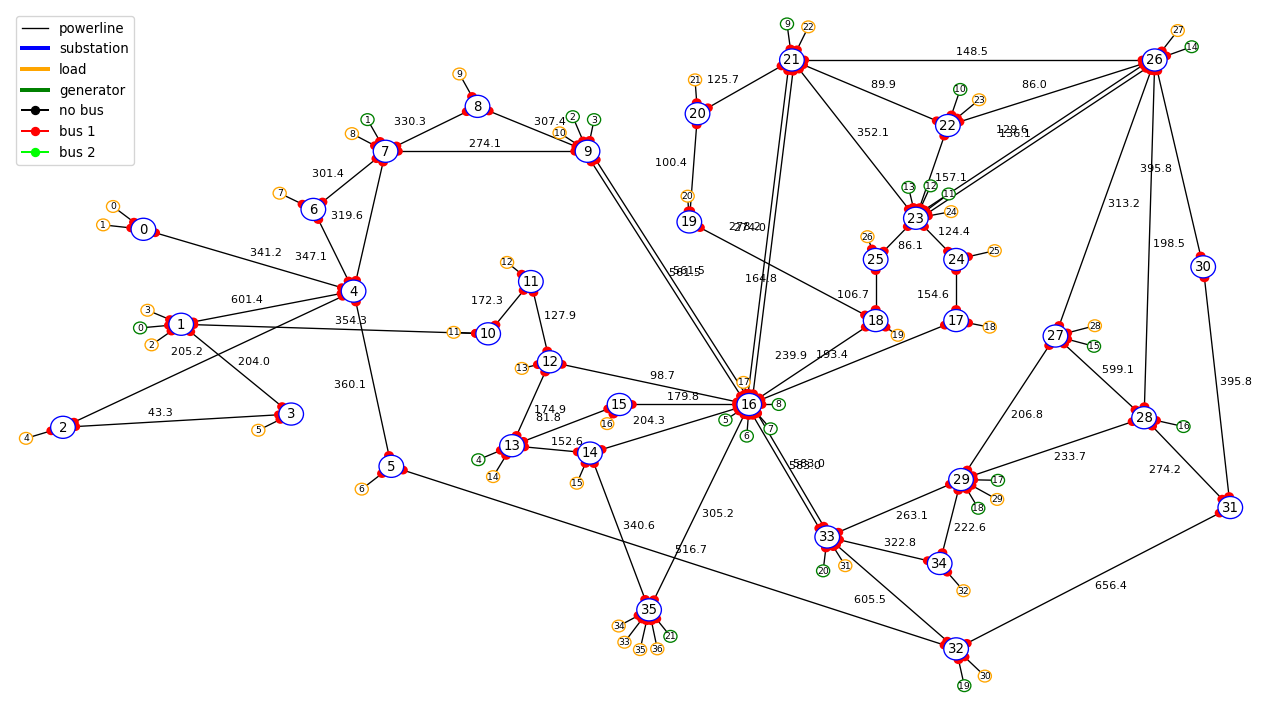

In [37]:
from grid2op.PlotGrid import PlotMatplot

plot_helper = PlotMatplot(env.observation_space)

# plot the thermal limits of each powerlines
fig_info = plot_helper.plot_info(line_values=env.get_thermal_limit())
fig_info.show()